In [1]:
library(survival)
library(survminer)
library(dplyr)
library(ggplot2)
library(lubridate)
library(ggsurvfit)
library(gtsummary)
library(tidycmprsk)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘tidycmprsk’


The following object is masked from ‘package:gtsummary’:

    trial




In [2]:
# Set random seed so this part is reproducible
# https://www.random.org/ 2023-08-09
set.seed(3866) 

In [3]:
df <- read.csv("../../../data/tcga/TCGA-LUAD-response-sig-surv-data.tsv",
               sep='\t', 
               row.names=1)

df$OS <- as.logical(df$OS)

In [4]:
ggsurvsave <- function(filename, plot = last_plot(), ...) {

  if (!inherits(plot, "ggforest")) {
    stop("Argument plot does is not a ggsurvplot object.")
  }
  gsp <-
    Reduce(
      '/',
      Filter(
        function(x) inherits(x, "ggplot"),
        plot
      )
    )
  ggsave(filename = filename, plot = gsp, ...)

}

In [5]:
 df %>% select(contains("Up")) %>% names

[1] "Response.Subtype.Cluster.0.ratio.cluster.0.Up"
[2] "Response.Subtype.Cluster.0.ratio.cluster.1.Up"
[3] "Response.Subtype.Cluster.1.ratio.cluster.0.Up"
[4] "Response.Subtype.Cluster.1.ratio.cluster.1.Up"
[5] "Response.Subtype.Cluster.1.ratio.cluster.2.Up"
[6] "Response.Subtype.Cluster.2.ratio.cluster.0.Up"
[7] "Response.Subtype.Cluster.2.ratio.cluster.1.Up"

In [6]:
names(df)

[1] "Response.Subtype.Cluster.0.ratio.cluster.0"     
 [2] "Response.Subtype.Cluster.0.ratio.cluster.0.Up"  
 [3] "Response.Subtype.Cluster.0.ratio.cluster.0.Down"
 [4] "Response.Subtype.Cluster.0.ratio.cluster.1"     
 [5] "Response.Subtype.Cluster.0.ratio.cluster.1.Up"  
 [6] "Response.Subtype.Cluster.0.ratio.cluster.1.Down"
 [7] "Response.Subtype.Cluster.1.ratio.cluster.0"     
 [8] "Response.Subtype.Cluster.1.ratio.cluster.0.Up"  
 [9] "Response.Subtype.Cluster.1.ratio.cluster.0.Down"
[10] "Response.Subtype.Cluster.1.ratio.cluster.1"     
[11] "Response.Subtype.Cluster.1.ratio.cluster.1.Up"  
[12] "Response.Subtype.Cluster.1.ratio.cluster.1.Down"
[13] "Response.Subtype.Cluster.1.ratio.cluster.2"     
[14] "Response.Subtype.Cluster.1.ratio.cluster.2.Up"  
[15] "Response.Subtype.Cluster.1.ratio.cluster.2.Down"
[16] "Response.Subtype.Cluster.2.ratio.cluster.0"     
[17] "Response.Subtype.Cluster.2.ratio.cluster.0.Up"  
[18] "Response.Subtype.Cluster.2.ratio.cluster.0.Down"
[19] "Response.Subtype.Cluster.2.ratio.cluster.1"     
[20] "Response.Subtype.Cluster.2.ratio.cluster.1.Up"  
[21] "Response.Subtype.Cluster.2.ratio.cluster.1.Down"
[22] "OS"                                             
[23] "OS.Time"                                        
[24] "ElasticNetPrediction"                           
[25] "LinearSVMPrediction"                            
[26] "Nonsilent.Mutation.Rate"                        
[27] "TIL.Regional.Fraction"

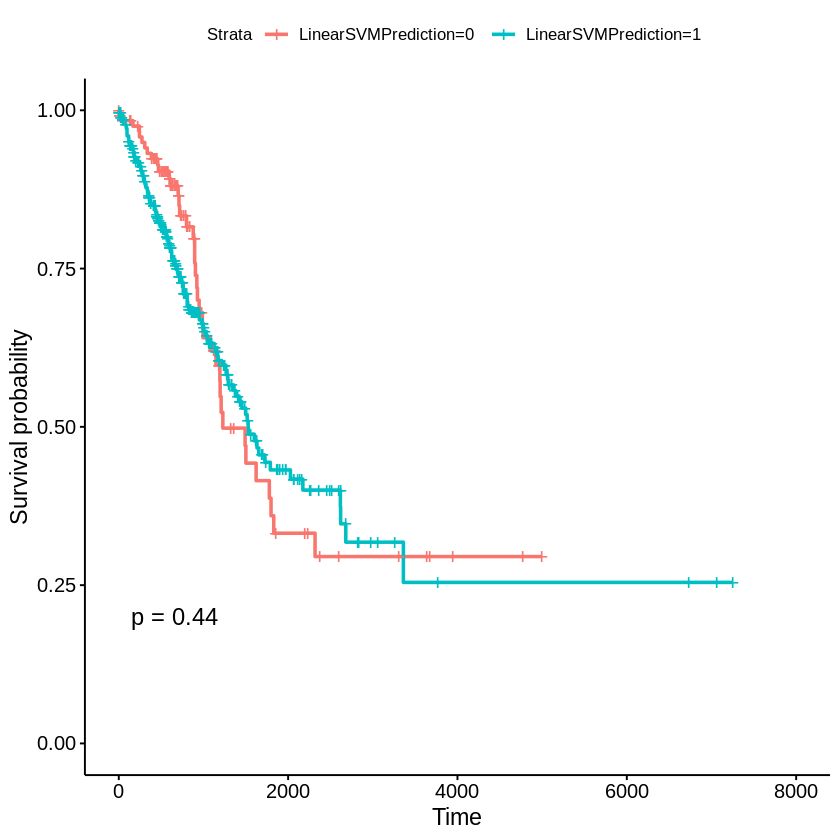

In [7]:
surv_object <- Surv(time = df$OS.Time, event = df$OS)

fit1 <- survfit(surv_object ~ LinearSVMPrediction, data = df)
ggsurvplot(fit1, data = df, pval = TRUE)



In [8]:
library(forestmodel)

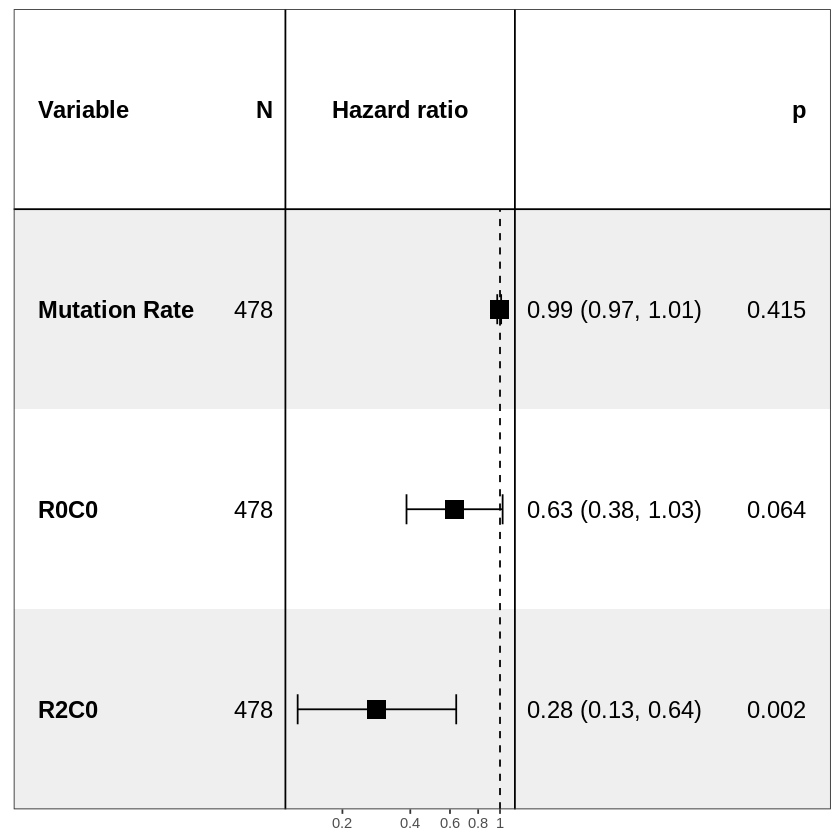

In [13]:
labelled::var_label(df) <- list(
    Nonsilent.Mutation.Rate = "Mutation Rate", #this variable is a numeric -> label works
    Response.Subtype.Cluster.0.ratio.cluster.0 = "R0C0", # factor -> label doesn't work!
    Response.Subtype.Cluster.2.ratio.cluster.0 = "R2C0" # numeric -> label works...
)


fit.coxph <- coxph(surv_object ~ Nonsilent.Mutation.Rate + Response.Subtype.Cluster.0.ratio.cluster.0 + Response.Subtype.Cluster.2.ratio.cluster.0, 
                   data = df)

gg <- forest_model(fit.coxph)

ggsave("../../../figures/su2c/ggforest-tcga-immune-features-signature.png",
       plot=gg,
       width=12,
       height=8,
       dpi=1000)

gg